In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import scatter_matrix

In [6]:
df = pd.read_csv('housing.csv')

In [32]:
print(df.columns)
df.describe()
df.info()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
#check NA 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <a list of 10 Patch objects>)

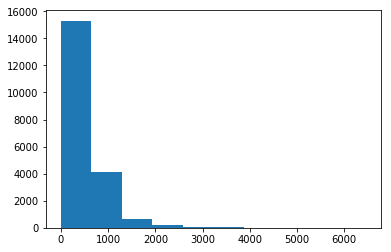

In [15]:
#check nonnulls to figure out how to substitute null
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'])

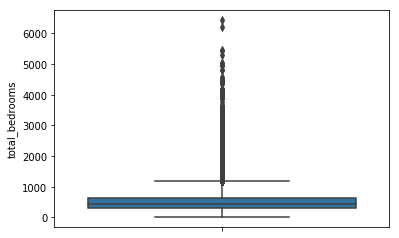

In [17]:
#check on outliers
#too many of outliers, will fillna with median
sns.boxplot(y='total_bedrooms', data = df)

In [20]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
#fillna with median based on categories of ocean_proximity

def tbmedian(data):
    op_unique = data['ocean_proximity'].unique()
    for i in op_unique:
        median = data[data['ocean_proximity'] == i]['total_bedrooms'].median()
        data.loc[data['ocean_proximity'] == i, 'total_bedrooms'] = data[data['ocean_proximity'] == i]['total_bedrooms'].fillna(median)

In [23]:
tbmedian(df)

In [24]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [81]:
#done with navalues, starting EDA

#sns.distplot(df['median_house_value'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27ade160>,
      dtype=object)

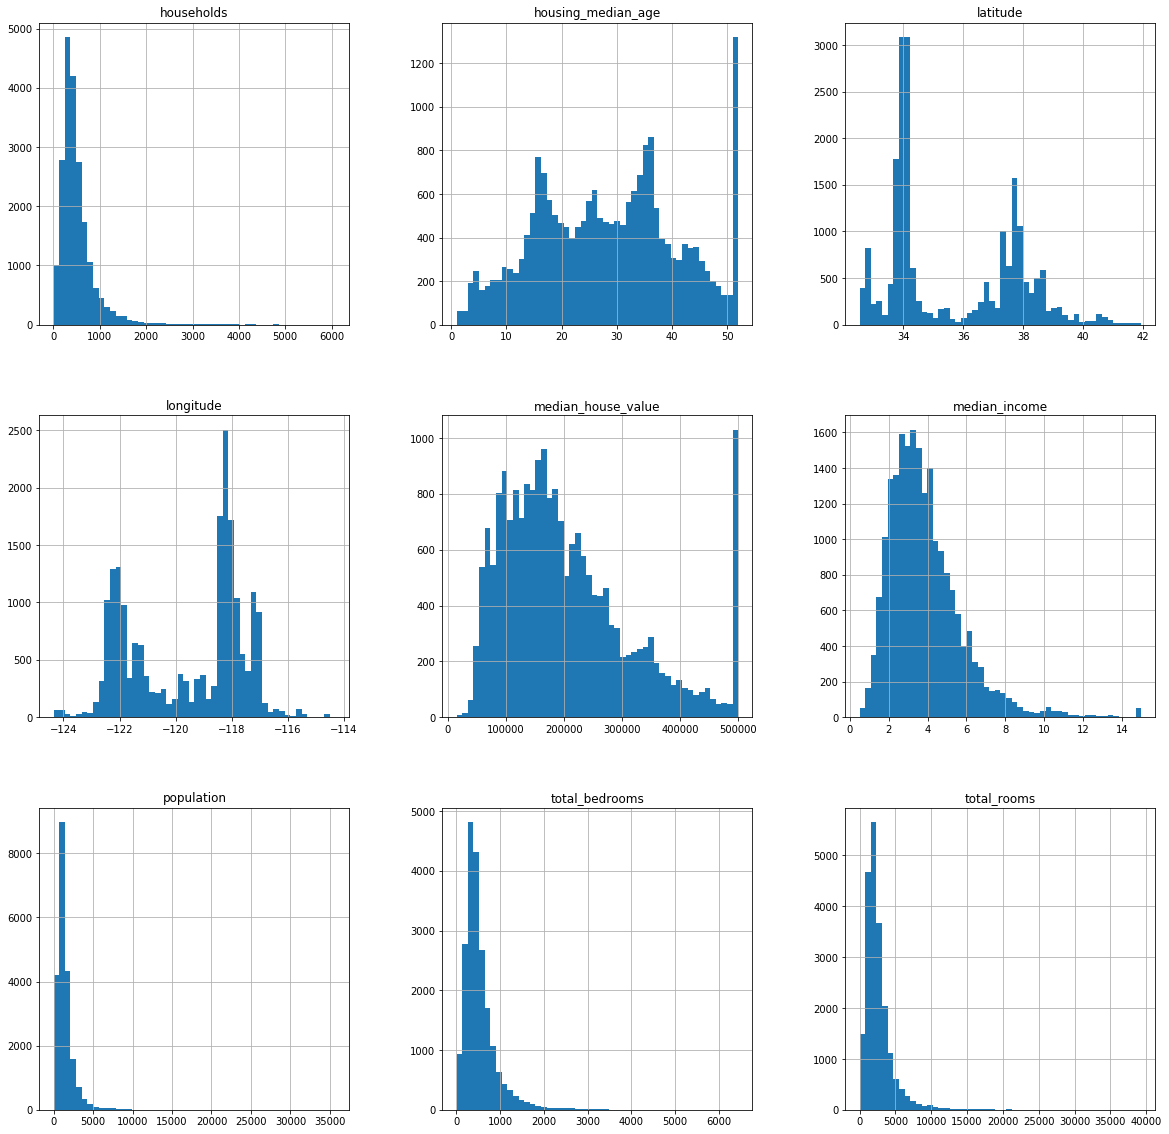

In [39]:
df.hist(bins = 50, figsize=(20,20))
#first let's make histogram of all the columns, we can tell that 
#there are quite some outliers in the median_house_value and
#housing_median_age.

Text(0.5, 0, 'Longitudes')

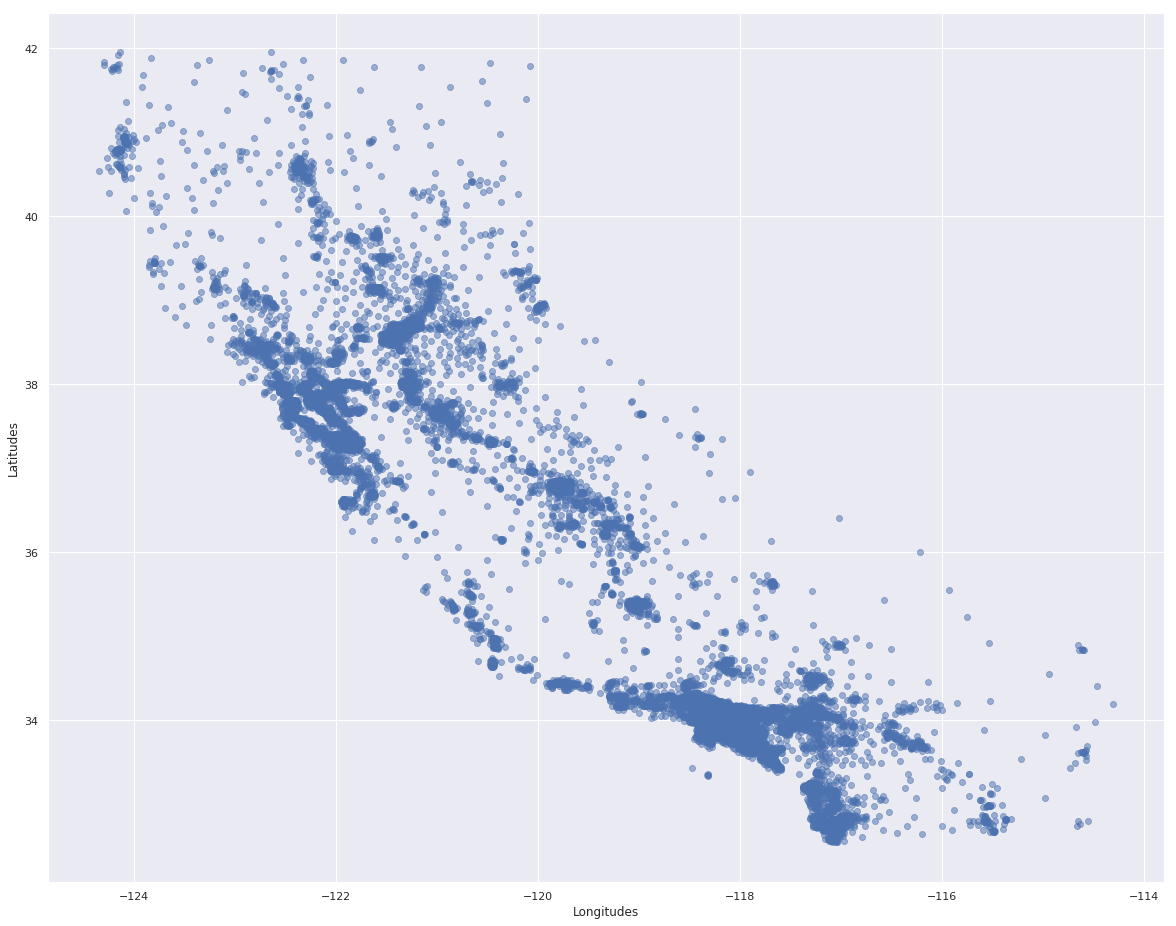

In [82]:
#there are coordinates in the df so let's use them
#plot out coordinates - we can find it's the shape of the CA state!

#then - do something that has more fun, checking density of housing
sns.set()
plt.figure(figsize = (20,16))
plt.scatter('longitude','latitude',data=df, alpha = 0.5)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')

#obviously, Bay Area and Los Angeles, and San Diego Areas 
#have the most records of data

<Figure size 1440x1152 with 0 Axes>

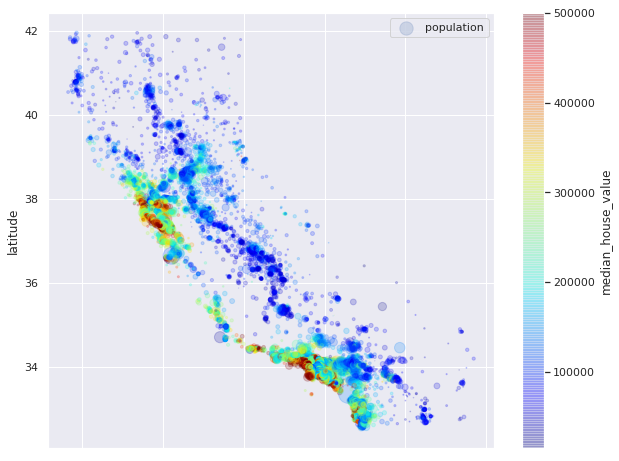

In [76]:
#take more factors into consideration
plt.figure(figsize=(20,16))
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2,
       s = df['population']/100, label = 'population', figsize = (10,8),
       c = 'median_house_value', cmap=plt.get_cmap("jet"), colorbar = True,)
plt.legend()
#we can tell that houses that near the ocean, have more people living
#and located in the Bay Area/Los Angeles Area are the most expensive ones

In [83]:
#making correlation plot among different columns
#first take a glance at how the other columns related to
#house prices

correl = df.corr()
correl.median_house_value.sort_values(ascending = False)
#obviously income is directly correlated, the rest doesn't
#seem very much. One thing that took my attention is that number
#of room/bedroom can't really be useful without know the size of
#the household so we probably need a new column (room/household)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049580
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [87]:
df['room_per_hold'] = df.total_rooms/df.households

/Users/lu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3239d2e8>,
      dtype=object)

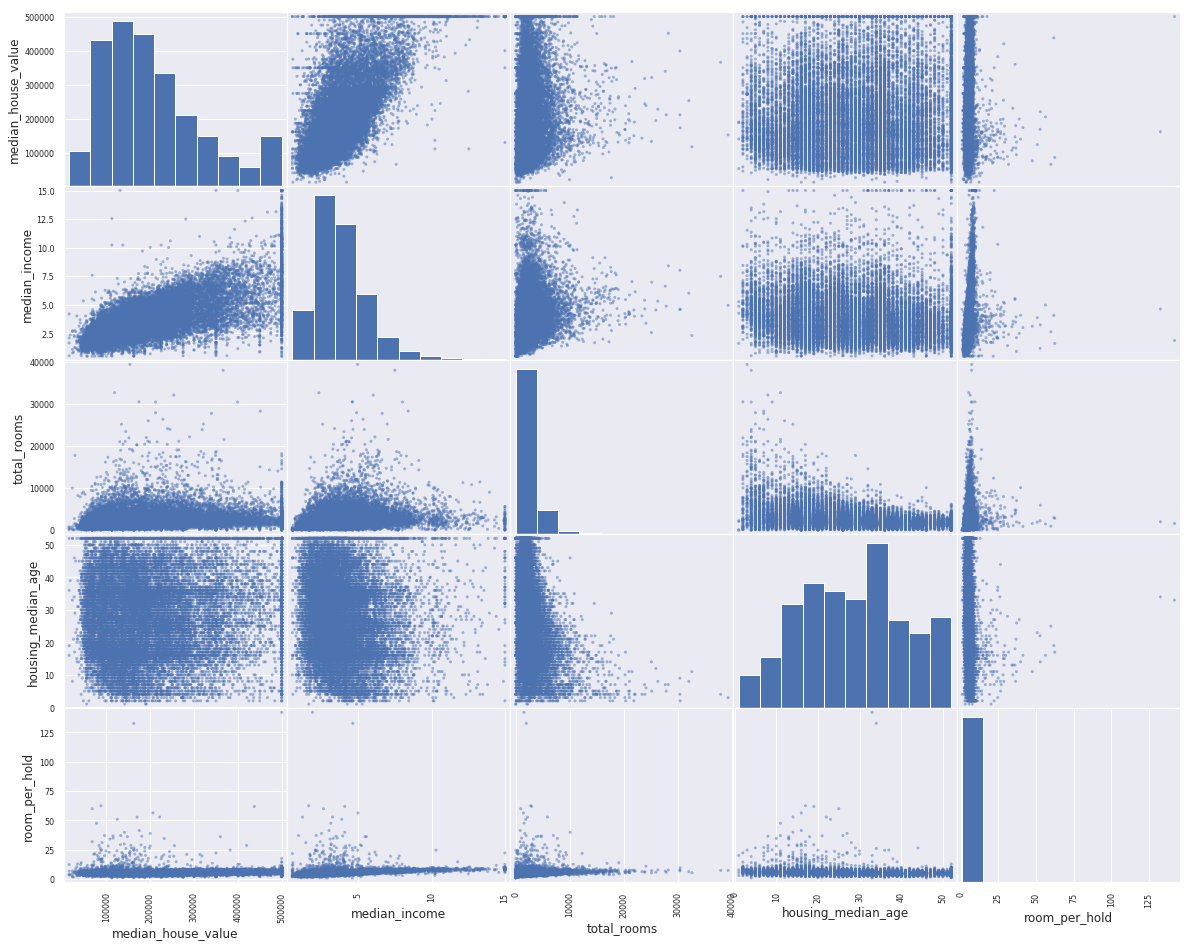

In [90]:
sns.set()
group = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age','room_per_hold']
scatter_matrix(df[group], figsize = (20,16))

In [92]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [94]:
from sklearn.impute import SimpleImputer

In [95]:
imputer = SimpleImputer(strategy = 'median')

In [97]:
imputer.fit(df.drop('ocean_proximity', axis = 1))

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [98]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00])

In [100]:
fm = df.drop('ocean_proximity', axis = 1)

In [101]:
fm.total_bedrooms.median()

435.0

In [102]:
X = imputer.transform(fm)

In [103]:
fm_t = pd.DataFrame(X, columns = fm.columns)

In [105]:
fm_t.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_hold
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,5.254717


In [107]:
cols = df.dtypes
cols[cols == 'object']

ocean_proximity    object
dtype: object

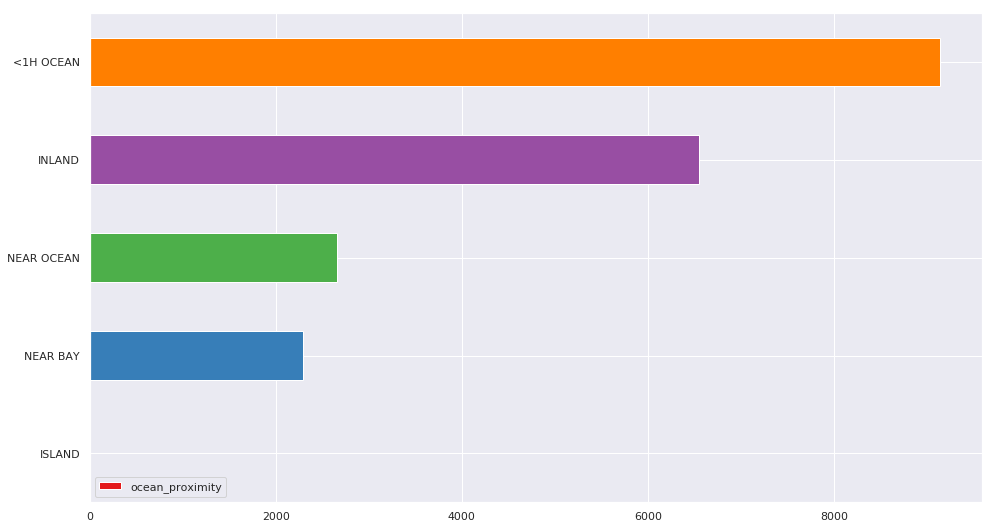

In [121]:
sns.set(palette='Set1')
df.ocean_proximity.value_counts().sort_values().plot(kind='barh',figsize=(16,9))
plt.legend()